# Twitter Sentimental Analysis

In [2]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize , wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvajs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploratory Data Analysis

In [11]:
df = pd.read_csv('vaccination_tweets.csv')

In [12]:
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [14]:
print('length of data is ',len(df))

length of data is  11020


In [15]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   16
Count of rows in the data is:   11020


In [16]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

#### Check unique target values

In [18]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

#### Columns/features in data

In [20]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

#### Droping unrequired datas

In [21]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis = 1)

In [22]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


#### Sample tweets

In [23]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")
print(text_df['text'].iloc[5],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 

Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN 



In [24]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [26]:
Df = text_df.copy()
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


### Text pre processing

In [28]:
def data_processing(text):
    
    #Converting into lowecase
    text = text.lower()
    
    #Removing with Urls
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    
    #handling Punctuations
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    
    #removing the stopwords
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    return " ".join(filtered_text)

text_df.text = text_df['text'].apply(data_processing)

In [29]:
# Removing Duplicates
text_df = text_df.drop_duplicates('text')

In [31]:
# Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [32]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [34]:
# Sample text after pre processing
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")
print(text_df['text'].iloc[5],"\n")
text_df.info()

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 

anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [35]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [36]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


#### Target data Visualization

<Axes: xlabel='sentiment', ylabel='count'>

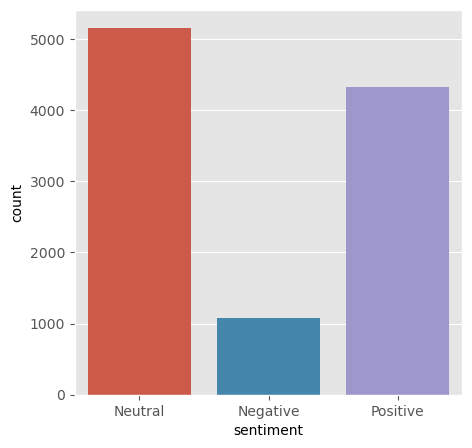

In [37]:
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

#### Visulaizing with piechart

Text(0.5, 1.0, 'Distribution of sentiments')

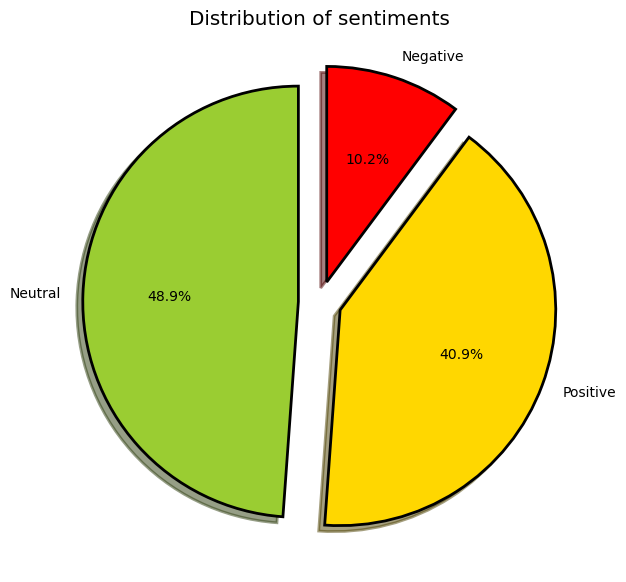

In [38]:
fig = plt.figure(figsize=(7,7)) 
# adjusting the size

colors = ("yellowgreen", "gold", "red") 
# Colors for 3 sentiments 

wp = {'linewidth':2, 'edgecolor':"black"} 
# defining line width and edge color

tags = text_df['sentiment'].value_counts()
#specifying different tages in piechart

explode = (0.1,0.1,0.1)
#adjusting the width to be expoded

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

#### Top 5 Positive Sentiments

In [40]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


#### Visualing via WordCloud

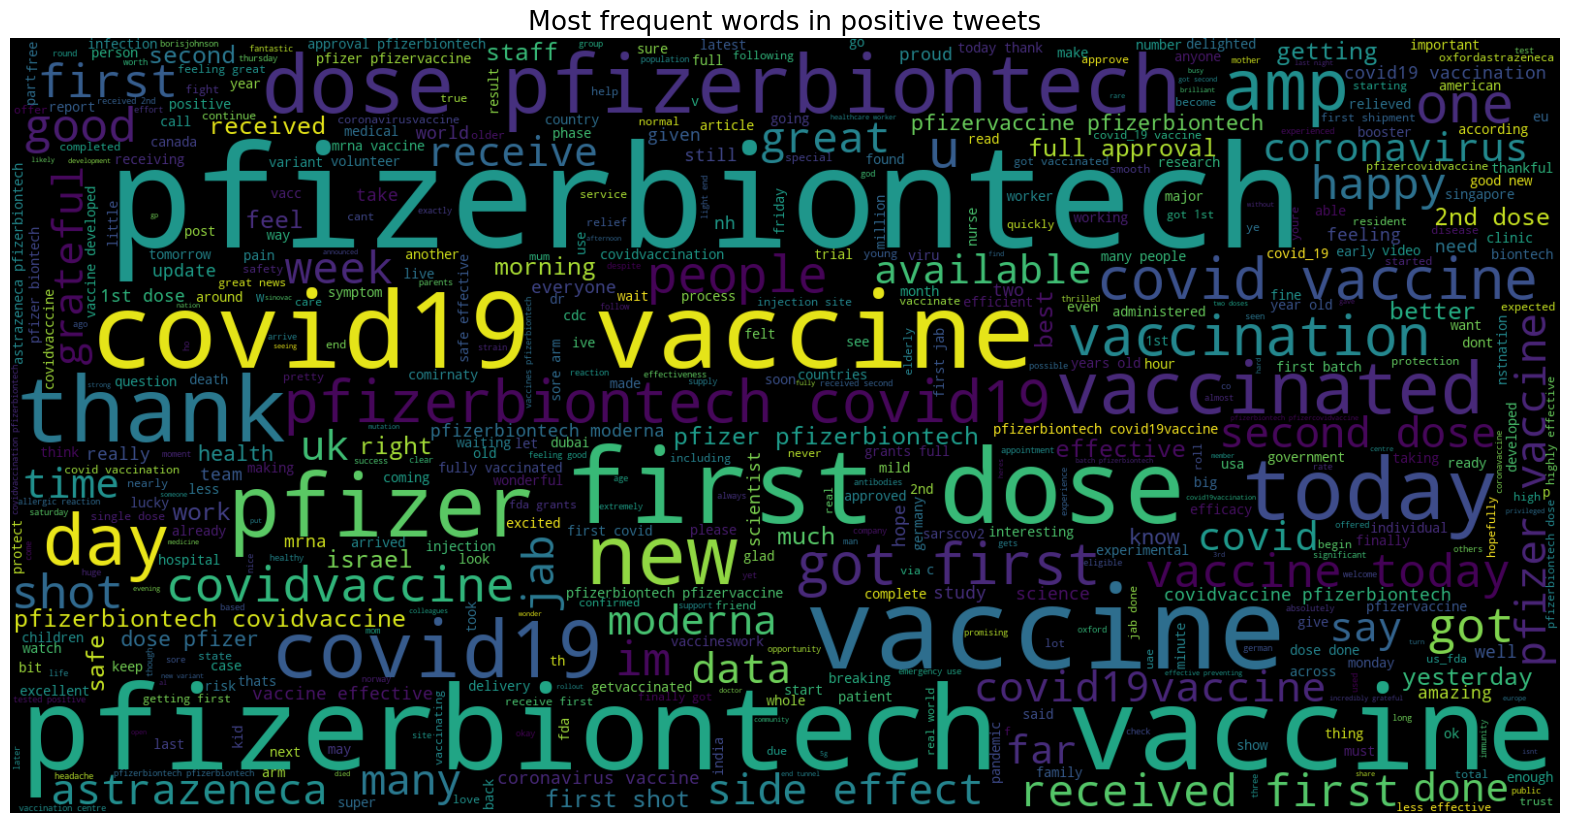

In [43]:
from wordcloud import WordCloud 
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

#### Top 5 Negative Sentiments

In [45]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


#### Visualing -ve tweets via WordCloud

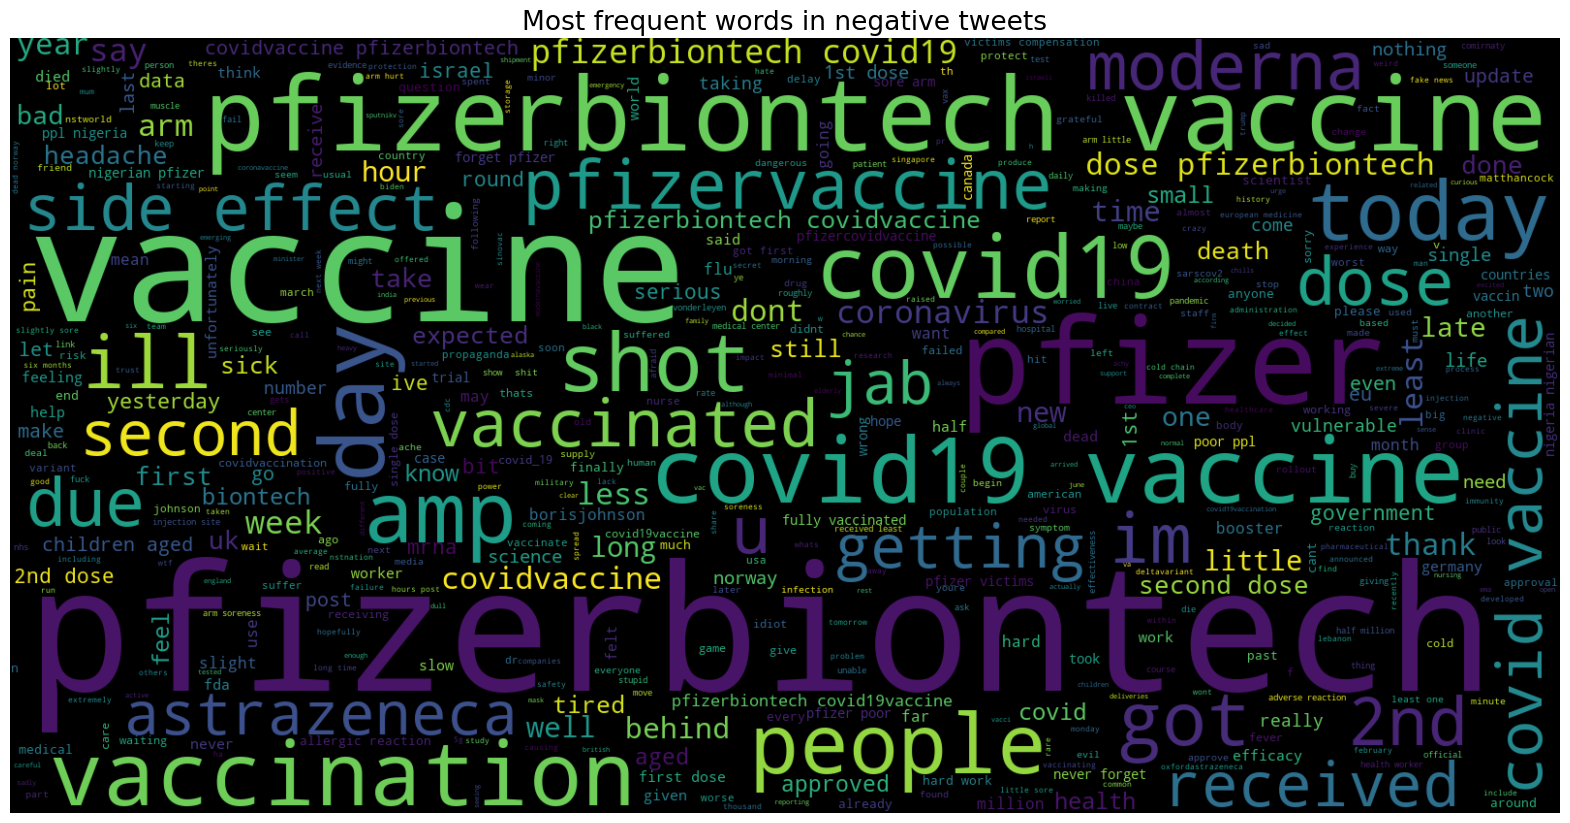

In [46]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

#### Top 5 Neutral Sentiments

In [47]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


#### Visualing neutral tweets via WordCloud

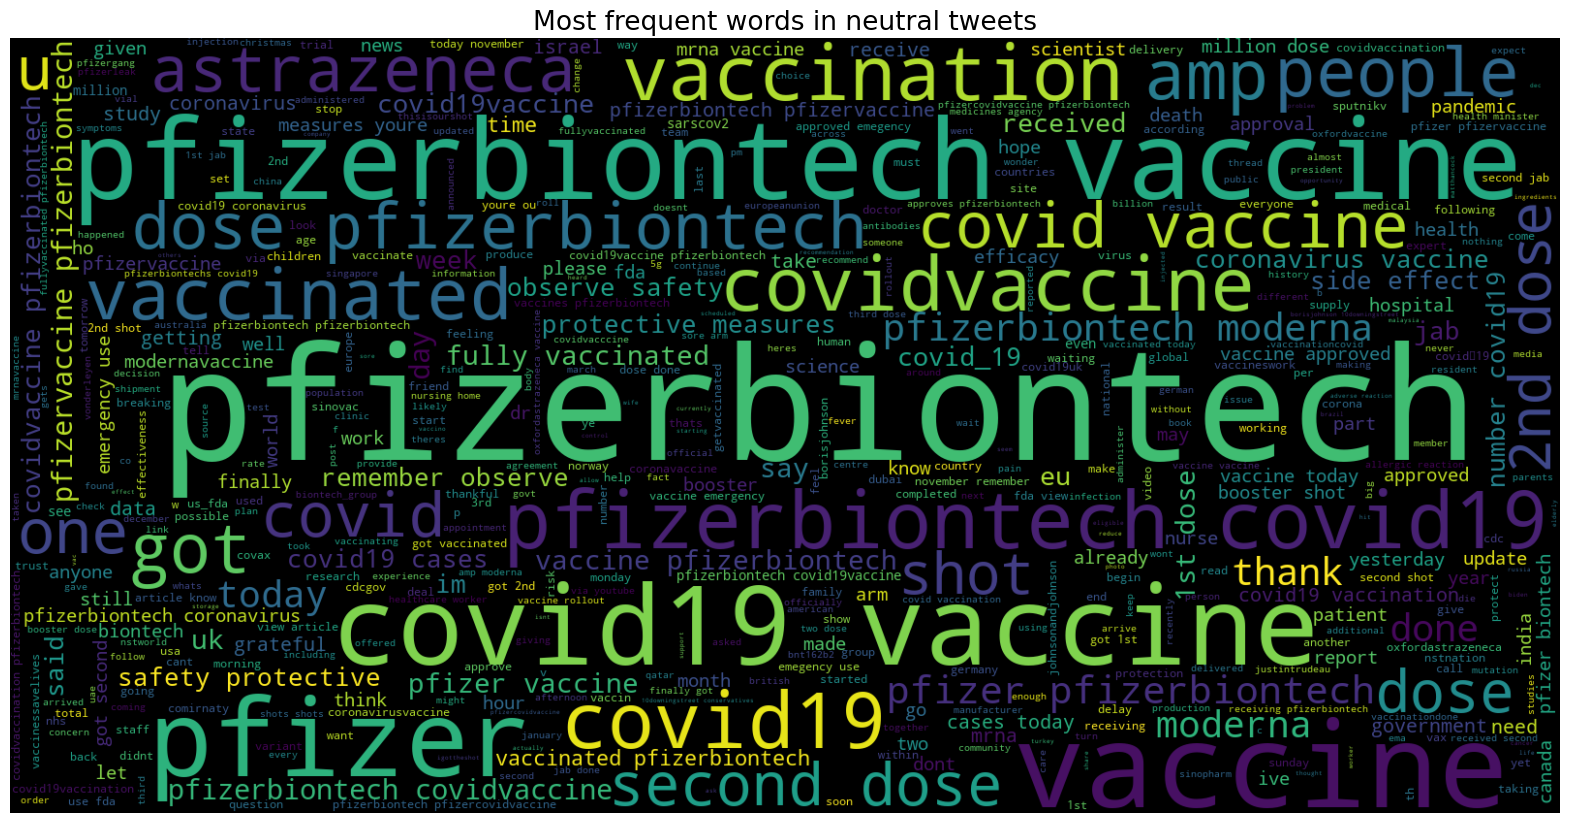

In [48]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [50]:
text_df['text'].iloc[0]

'folks said daikon paste could treat cytokine storm pfizerbiontech'

#### Bi-Gram Model

In [51]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])
vect.transform(['text'])

<1x78583 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [52]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']


#### Splitting data into train and test

In [54]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state =42)

In [55]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 78583)
Size of y_train: (8434,)
Size of x_test: (2109, 78583)
Size of y_test: (2109,)


In [56]:
import warnings
warnings.filterwarnings('ignore')

#### Logistic Regression

In [57]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.64%


#### Confusion matrix

In [58]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



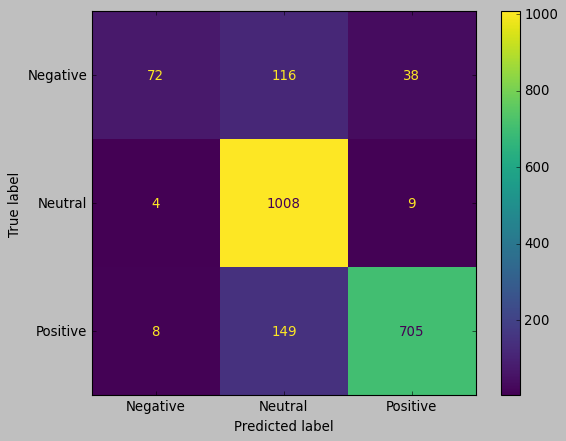

In [59]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

#### Hyper-parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [62]:
print("Best parameters:", grid.best_params_)
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Best parameters: {'C': 10}
Test accuracy: 85.92%


In [63]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  84  104   38]
 [   4 1008    9]
 [  10  132  720]]


              precision    recall  f1-score   support

    Negative       0.86      0.37      0.52       226
     Neutral       0.81      0.99      0.89      1021
    Positive       0.94      0.84      0.88       862

    accuracy                           0.86      2109
   macro avg       0.87      0.73      0.76      2109
weighted avg       0.87      0.86      0.85      2109



#### Linear SVC

In [64]:
from sklearn.svm import LinearSVC

In [65]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [67]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy for SVC model is : {:.2f}%".format(svc_acc*100))

test accuracy for SVC model is : 87.34%


In [69]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 101   91   34]
 [   6 1007    8]
 [  14  114  734]]


              precision    recall  f1-score   support

    Negative       0.83      0.45      0.58       226
     Neutral       0.83      0.99      0.90      1021
    Positive       0.95      0.85      0.90       862

    accuracy                           0.87      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.88      0.87      0.87      2109



### Hyper-parameter Tuning on Linear SVC

In [70]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [71]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [72]:
y_pred = grid.predict(x_test)

In [73]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.58%


In [74]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 105   87   34]
 [   7 1005    9]
 [  14  111  737]]


              precision    recall  f1-score   support

    Negative       0.83      0.46      0.60       226
     Neutral       0.84      0.98      0.90      1021
    Positive       0.94      0.85      0.90       862

    accuracy                           0.88      2109
   macro avg       0.87      0.77      0.80      2109
weighted avg       0.88      0.88      0.87      2109



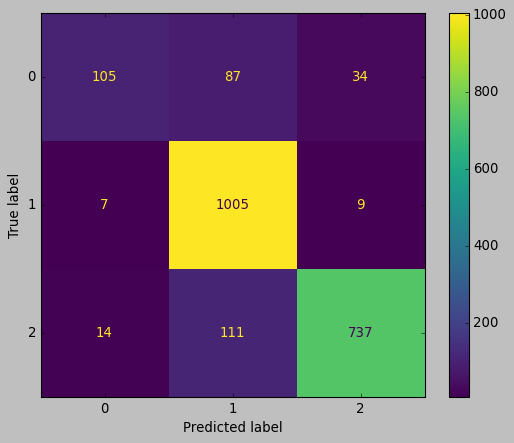

In [75]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

#### Train the Naive bayes model

In [76]:
from sklearn.naive_bayes import MultinomialNB

Naive_model = MultinomialNB()
Naive_model.fit(x_train, y_train)

MultinomialNB()

In [77]:
naive_pred = Naive_model.predict(x_test)
naive_acc = accuracy_score(naive_pred, y_test)
print("test accuracy: {:.2f}%".format(naive_acc*100))

test accuracy: 75.68%


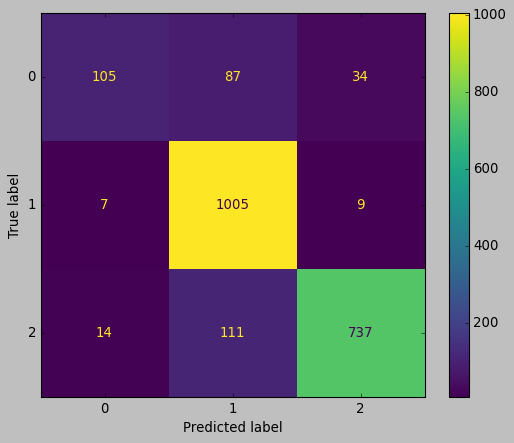

In [78]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [80]:
from sklearn.metrics import classification_report

y_pred = Naive_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.38      0.23      0.29       226
     Neutral       0.84      0.77      0.81      1021
    Positive       0.73      0.88      0.80       862

    accuracy                           0.76      2109
   macro avg       0.65      0.63      0.63      2109
weighted avg       0.75      0.76      0.75      2109



## Prediction part

#### Predicting With NaiveBayes

In [87]:
inp = text_df.loc[0][0]
bow_x_test = vect.transform([inp]) 
print('Given Text : ',inp)
print('-'*80)
bow_x_test = vect.transform([inp])
df_predit = Naive_model.predict(bow_x_test)
print("Actual result is : ",text_df.loc[0][2])
print('-'*80)
print('-'*80)
print("The Sentiment of Your Review Is :",df_predit)

Given Text :  folks said daikon paste could treat cytokine storm pfizerbiontech
--------------------------------------------------------------------------------
Actual result is :  Neutral
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
The Sentiment of Your Review Is : ['Neutral']


#### 2.Predicting with Logistic Regression

In [89]:
Sec_inp = text_df.loc[10][0]
bow_x_test = vect.transform([Sec_inp]) 
print('Given Text : ',Sec_inp)
print('-'*80)
bow_x_test = vect.transform([Sec_inp])
df_predit_1 =logreg.predict(bow_x_test)
print("Actual result is : ",text_df.loc[10][2])
print('-'*80)
print("The Sentiment of Your Review Is ",df_predit_1)
print('-'*80)

Given Text :  deaths closing 300000 mark millions people wait pfizerbiontech vaccine first u
--------------------------------------------------------------------------------
Actual result is :  Positive
--------------------------------------------------------------------------------
The Sentiment of Your Review Is  ['Positive']
--------------------------------------------------------------------------------


#### 3.Predicting With SVM

In [90]:
Third_inp  = text_df.loc[4510][0]
bow_x_test = vect.transform([Third_inp]) 
print('Given Text : ',Third_inp)
print('-'*80)
bow_x_test = vect.transform([Third_inp])
df_predit_2 =SVCmodel.predict(bow_x_test)
print("Actual result is : ",text_df.loc[4510][2])
print('-'*80)
print("The Sentiment of Your Review Is ",df_predit_2)
print('-'*80)

Given Text :  think 12 weeks time say sorry ran vaccines pfizerbiontech vaccinestrategy
--------------------------------------------------------------------------------
Actual result is :  Negative
--------------------------------------------------------------------------------
The Sentiment of Your Review Is  ['Negative']
--------------------------------------------------------------------------------


#### Predicting

In [92]:
print("Review : 1 = ",text_df.loc[4510][0])
print("Review : 2 = ",text_df.loc[10][0])
print("Review : 3 = ",text_df.loc[0][0])

Input = int(input("Enter the Number of the review 1-3: "))

if Input == 1:
    Third_inp = text_df.loc[4510][0]
    bow_x_test = vect.transform([Third_inp]) 
    bow_x_test = vect.transform([Third_inp])
    df_predit_2 = SVCmodel.predict(bow_x_test)
    print("The Sentiment of Your Review Is ", df_predit_2)
    print('-'*100)
    
    
elif Input == 2:
    Sec_inp = text_df.loc[10][0]
    bow_x_test = vect.transform([Sec_inp]) 
    bow_x_test = vect.transform([Sec_inp])
    df_predit_1 =logreg.predict(bow_x_test)
    print("The Sentiment of Your Review Is ",df_predit_1)
    print('-'*100)
    
    
elif Input == 3:
    inp = text_df.loc[0][0]
    bow_x_test = vect.transform([inp])
    print('-'*80)
    bow_x_test = vect.transform([inp])
    df_predit = Naive_model.predict(bow_x_test)
    print('-'*80)
    print("The Sentiment of Your Review Is :",df_predit)
    
    
else:
    print('OOPS! Invalid input')


Review : 1 =  think 12 weeks time say sorry ran vaccines pfizerbiontech vaccinestrategy
Review : 2 =  deaths closing 300000 mark millions people wait pfizerbiontech vaccine first u
Review : 3 =  folks said daikon paste could treat cytokine storm pfizerbiontech
Enter the Number of the review 1-3: 2
The Sentiment of Your Review Is  ['Positive']
----------------------------------------------------------------------------------------------------
